Step 2 notebooks are revolved around creating and assessing the latent space.

Steps performed in this notebook:

**1. Load in CCA dataframes:** Created by notebook 2-perform_cca.

**2. Assess latent space:** Joint embedding produced by CCA is assess via calculating distances between every X and Y.

In [11]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use('ggplot')

%matplotlib inline

## 1. Load in CCA dataframes

In [12]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns 

from scipy.spatial import distance

# Load CCA embedding of choice
def load_pickle(fn, path):
    with open(os.path.join(path, '%s.pickle' % fn), 'rb') as f:
        df = pickle.load(f) 
    return df

cca_type = 'cca'
latent_dims = 100

df_spec2vec = load_pickle('dataframe_spec2vec_%s_%d' % (cca_type, latent_dims), '/lustre/BIF/nobackup/unen004/data')
df_ms2ds = load_pickle('dataframe_ms2ds_%s_%d' % (cca_type, latent_dims), '/lustre/BIF/nobackup/unen004/data')

## 2. Assess latent space
The cosine distance is calculated between every spectrum (X) and corresponding structure (Y) in the latent space. It is also compared against a random baseline in order to see if they are closer together than any random spectrum and structure pair (grey line). This is the case.

In [13]:
def get_dist_per_metric(df, metric):
    dist_list = []
    rand_list = []
    for i, row in df.iterrows():  
        # Get samples
        x = row['X']
        y = row['Y']
        
        # Also get distance between X and random Y point
        rand_y = df.sample()['Y'].values[0]

        # Get distance between X and Y in latent space, and append to list
        if metric == 'cosine':
            dist_list.append(distance.cosine(x, y))
            rand_list.append(distance.cosine(x, rand_y))
        elif metric == 'euclidean':
            dist_list.append(distance.euclidean(x, y))
            rand_list.append(distance.euclidean(x, rand_y))
        else:
            exit(1)
    
    # Turn distance lists into dataframes
    dist_df = pd.DataFrame(np.c_[dist_list, rand_list, df['set'], df['cf_class']],
                           columns=['true', 'random', 'set', 'cf_class'])
    
    return dist_df

metric = 'cosine'
dist_df_spec2vec = get_dist_per_metric(df_spec2vec, metric)
dist_df_ms2ds = get_dist_per_metric(df_ms2ds, metric)

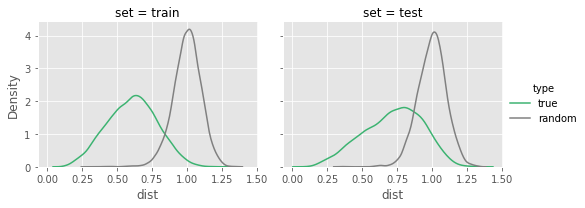

In [14]:
def plot_dist(dist_df, metric='cosine'):
    dist_df_m = dist_df.melt(id_vars=['set', 'cf_class'], value_name='dist', var_name='type')    
    g = sns.FacetGrid(dist_df_m, col='set', hue='type', height=3, aspect=1.2, palette=['mediumseagreen', 'gray'])
    g.map(sns.kdeplot, 'dist')
    #g.fig.suptitle('%s %s' % (spectral, metric))
    g.add_legend()
    
plot_dist(dist_df_spec2vec, metric)

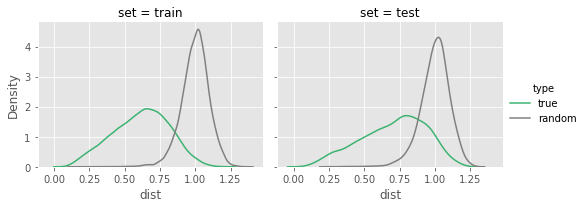

In [15]:
plot_dist(dist_df_ms2ds, metric)